1D Burgers' Equation Solver using Finite Difference Method

Initial condition size: 102
   0         1         2         3         4         5         6        7    \
0    0       1.0       1.0       1.0       1.0       1.0       1.0      1.0   
1    0      -1.0       1.0       1.0       1.0       1.0       1.0      1.0   
2    0       5.0      -3.0       1.0       1.0       1.0       1.0      1.0   
3    0     -21.0      21.0      -7.0       1.0       1.0       1.0      1.0   
4    0     105.0    -119.0      65.0     -15.0       1.0       1.0      1.0   
5    0    -553.0     697.0    -463.0     177.0     -31.0       1.0      1.0   
6    0    3053.0   -4123.0    3137.0   -1519.0     449.0     -63.0      1.0   
7    0  -17405.0   24749.0  -20695.0   11729.0   -4511.0    1089.0   -127.0   
8    0  101713.0 -150447.0  135041.0  -85599.0   39169.0  -12543.0   2561.0   
9    0 -606033.0  924849.0 -877215.0  605217.0 -313791.0  121089.0 -33279.0   

      8      9    ...    92      93       94       95       96        97   \
0     1.0    1.0  ...    

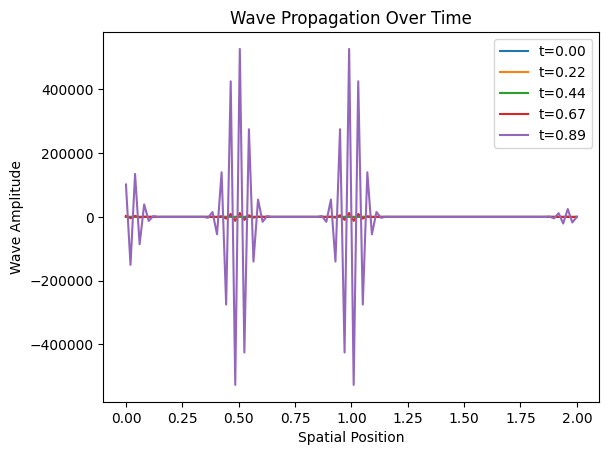

In [1]:
# Import necessary libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Constants
# These define the simulation parameters.
dt = 0.1  # Time step
dx = 0.1  # Spatial step
nu = 0.2  # Diffusion coefficient
x_initial = np.linspace(0, 2, 100)  # Spatial domain

# Step 1: Initialize initial conditions
# The initial condition specifies the wave profile at time t=0.
u0 = []
for x in x_initial:
    if 0.5 <= x <= 1:
        u0.append(2)  # High value in the range [0.5, 1]
    else:
        u0.append(1)  # Low value outside the range

# Add boundary conditions explicitly (zero padding if needed)
u0.insert(0, 0)  # Left boundary condition
u0.append(0)     # Right boundary condition

# Print the size of the initial condition for debugging
print("Initial condition size:", len(u0))

# Step 2: Time discretization
# Define the time array for simulation.
time = np.linspace(0, 1, 10)  # 10 time steps

# Step 3: Initialize data storage for simulation
# `All_datats` will store the wave profile at each time step.
All_datats = [u0.copy()]

# Step 4: Perform the numerical simulation
# Loop over time steps to calculate the wave profile.
for n in range(1, len(time)):
    new_u = [0]  # Left boundary condition for the new time step
    for i in range(1, len(x_initial)):
        # Apply the finite difference scheme (diffusion equation)
        next_val = All_datats[n - 1][i] + nu * (dt / dx**2) * (
            All_datats[n - 1][i + 1] - 2 * All_datats[n - 1][i] + All_datats[n - 1][i - 1])
        new_u.append(next_val)
    new_u.append(0)  # Right boundary condition
    All_datats.append(new_u)  # Store the computed time step

# Step 5: Convert results to a DataFrame for better visualization
# Convert the list of time steps into a Pandas DataFrame.
All_datats_df = pd.DataFrame(All_datats)
print(All_datats_df)

# Step 6: Plot the results
# Choose specific time steps to plot.
for n in range(0, len(time), 2):  # Plot every other time step
    plt.plot(x_initial, All_datats_df.iloc[n, 1:-1], label=f"t={time[n]:.2f}")

# Add labels, legend, and title
plt.xlabel("Spatial Position")
plt.ylabel("Wave Amplitude")
plt.title("Wave Propagation Over Time")
plt.legend()
plt.show()
